# EEG SNR Batch
This notebook takes multiple `.npy` and `.json` files and computes the modified SNR for all the epochs in the `npy` file.

## Import all necessary packages

In [1]:
# Standard libraries
import json
import numpy as np
import xlsxwriter
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

# Custom libraries
from Functions import processing
from Functions import data_tools

## Load data

In [2]:
# List of file names to be processed
files = [  
    "sub-P005_ses-S002_task-T1_run-001_eeg"
]

#  "sub-P003_ses-S001_task-T1_run-001_eeg",
#    "sub-P003_ses-S002_task-T1_run-001_eeg",
#    "sub-P004_ses-S001_task-T1_run-001_eeg",
#    "sub-P004_ses-S002_task-T1_run-001_eeg",
#    "sub-P004_ses-S002_task-T1_run-002_eeg",
#    "sub-P005_ses-S001_task-T1_run-001_eeg",
#    "sub-P005_ses-S001_task-T1_run-002_eeg",
#    "sub-P005_ses-S001_task-T1_run-003_eeg",
#    "sub-P005_ses-S002_task-T1_run-001_eeg",
#    "sub-P006_ses-S001_task-T1_run-001_eeg",
#    "sub-P006_ses-S002_task-T1_run-001_eeg",
#    "sub-P006_ses-S002_task-T1_run-002_eeg",
#    "sub-P007_ses-S001_task-T1_run-001_eeg",
#    "sub-P007_ses-S001_task-T1_run-002_eeg",
#    "sub-P007_ses-S002_task-T1_run-001_eeg",
#    "sub-P008_ses-S001_task-T1_run-001_eeg",
#    "sub-P008_ses-S002_task-T1_run-001_eeg",
#    "sub-P008_ses-S002_task-T1_run-002_eeg",
#    "sub-P009_ses-S001_task-T1_run-001_eeg",
#    "sub-P009_ses-S002_task-T1_run-001_eeg",
#    "sub-P010_ses-S001_task-T1_run-001_eeg",
#    "sub-P010_ses-S002_task-T1_run-001_eeg"
# Enable to run files in Daniel's PC
# files = [
#     "sub-P004_ses-S001_task-T1_run-001_eeg",
#     "sub-P004_ses-S002_task-T1_run-002_eeg",
#     ]

#isolate subject IDs
subject_ids = [file.split('_')[0] for file in files]
unique_subject_ids = list(set(subject_ids))

# Preallocate variables
eeg_epochs = [None] * len(files)
settings = [None] * len(files)

# Import data
for f, file in enumerate(files):
    # Import EEG data
    eeg_epochs[f] = np.load(f"Data\{file}.npy")

    # Import settings
    with open(f"Data\{file}.json", "r") as file_object:
        settings[f] = json.load(file_object)

<string>:45: SyntaxWarning: invalid escape sequence '\{'
<string>:48: SyntaxWarning: invalid escape sequence '\{'
<>:45: SyntaxWarning: invalid escape sequence '\{'
<>:48: SyntaxWarning: invalid escape sequence '\{'
<string>:45: SyntaxWarning: invalid escape sequence '\{'
<string>:48: SyntaxWarning: invalid escape sequence '\{'
<>:45: SyntaxWarning: invalid escape sequence '\{'
<>:48: SyntaxWarning: invalid escape sequence '\{'
C:\Users\danie\AppData\Local\Temp\ipykernel_26984\3356155002.py:45: SyntaxWarning: invalid escape sequence '\{'
  eeg_epochs[f] = np.load(f"Data\{file}.npy")
C:\Users\danie\AppData\Local\Temp\ipykernel_26984\3356155002.py:48: SyntaxWarning: invalid escape sequence '\{'
  with open(f"Data\{file}.json", "r") as file_object:


Creating RawArray with float64 data, n_channels=15, n_times=1005568
    Range : 0 ... 1005567 =      0.000 ...  3927.996 secs
Ready.


## Compute the Power Spectral Density (PSD)

Compute the PSD of all the epoch for each file.

In [3]:
# PSD settings
window_size = 4 # Length of window for PSD [sec]

# Preallocate variables
eeg_f = [None] * len(files)
eeg_pxx = [None] * len(files)   # Preallocate to list in case not all files have the same number of channels

# Compute PSD for each file
for f,_ in enumerate(files):
    [eeg_f[f], eeg_pxx[f]] = signal.welch(
        x = eeg_epochs[f],
        fs = settings[f]["eeg_srate"],
        nperseg = window_size*settings[f]["eeg_srate"]
        )

## Visualize PSDs

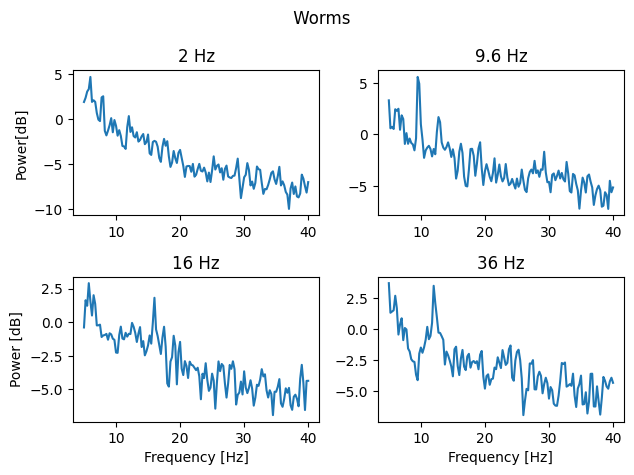

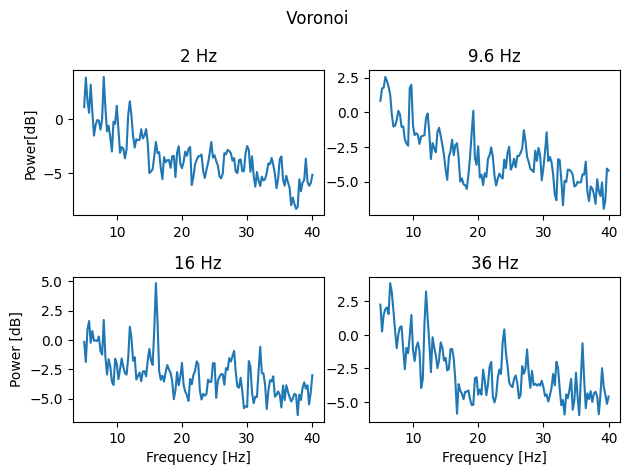

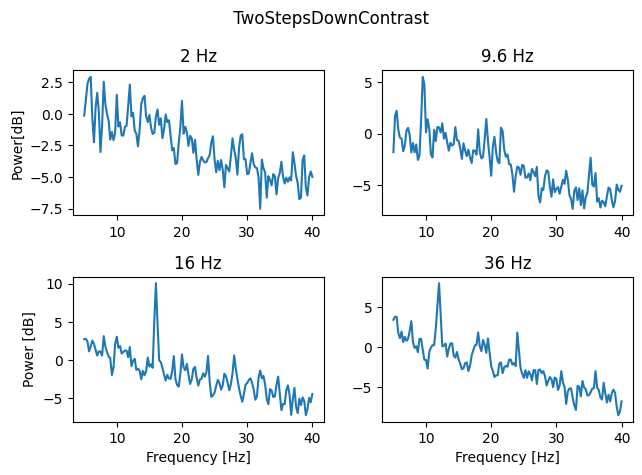

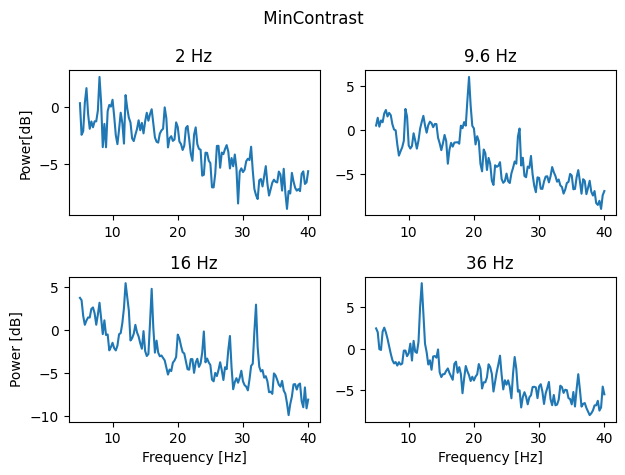

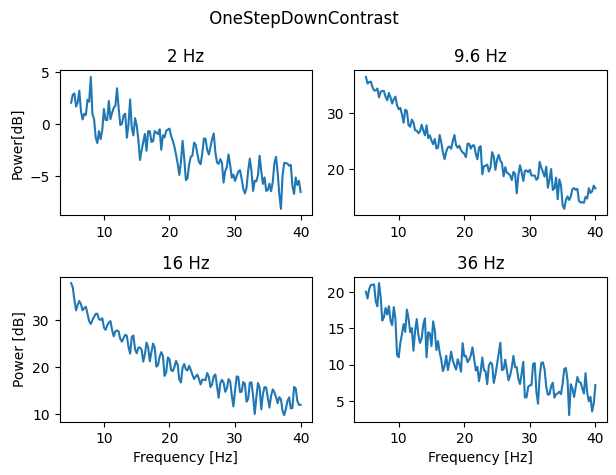

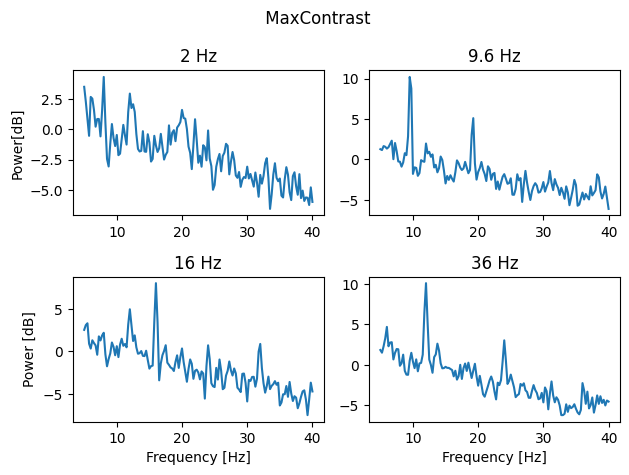

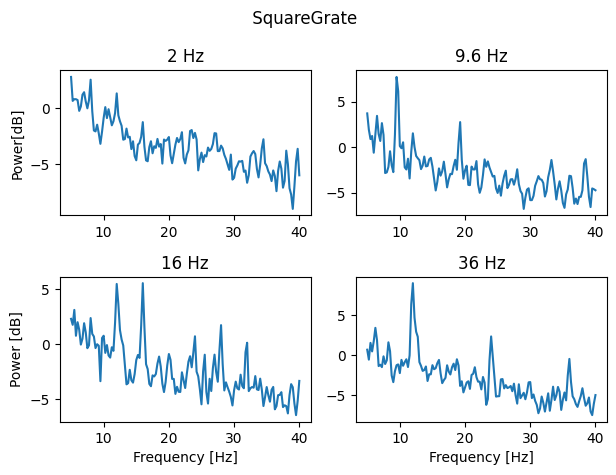

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to convert PSD to dB
def convert_to_db(psd):
    return 10 * np.log10(psd)

# Plot settings
plot_psd = True   # Enable to see plots
f_limits = [5, 40]  # Frequency limits for the plots [min, max][Hz]
file_to_plot = 0    # Select index of file to be plotted 

if plot_psd:
    for s, stim in settings[file_to_plot]["stimuli"].items():
        fig, ax = plt.subplots(2, 2)
        fig.suptitle(stim)

        for f, freq in settings[file_to_plot]["freqs"].items():
            fmask = (eeg_f[file_to_plot] >= f_limits[0]) & (eeg_f[file_to_plot] <= f_limits[1])
            temp_freq = eeg_f[file_to_plot][fmask]

            temp_mean = np.mean(eeg_pxx[file_to_plot][int(s), int(f), :, :], axis=0)[fmask]
            temp_sd = np.std(eeg_pxx[file_to_plot][int(s), int(f), :, :], axis=0)[fmask]

            # Convert PSD to dB
            temp_mean_db = convert_to_db(temp_mean)
            temp_sd_db = convert_to_db(temp_sd)

            row = int(f) // 2
            col = int(f) % 2
            ax[row, col].plot(temp_freq, temp_mean_db, '-')
           # ax[row, col].fill_between(temp_freq, temp_mean_db - temp_sd_db, temp_mean_db + temp_sd_db, alpha=0.3)
            ax[row, col].set_title(f"{freq} Hz")

        ax[0, 0].set_ylabel("Power[dB]")
        ax[1, 0].set_ylabel("Power [dB]")
        ax[1, 0].set_xlabel("Frequency [Hz]")
        ax[1, 1].set_xlabel("Frequency [Hz]")
        plt.tight_layout()
        plt.show()



## PSD plot per channel

In [36]:
settings[0]["stimuli"]

{'0': ' Static',
 '1': ' WoodGrain',
 '2': ' OneStepDownContrast',
 '3': ' MinContrast',
 '4': ' MaxContrast',
 '5': ' TwoStepsDown',
 '6': ' Checkerboard'}

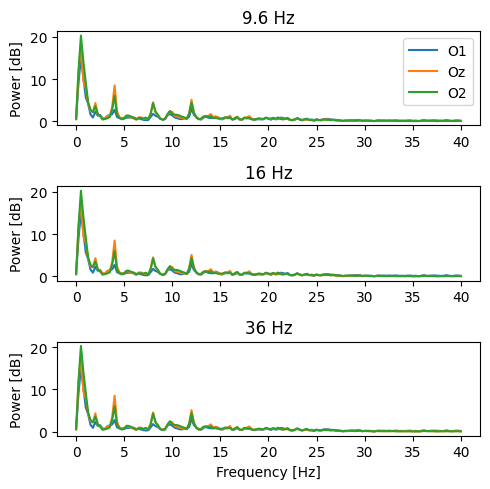

In [37]:
import matplotlib.pyplot as plt

# Variables to select stimulus type and channel names
file_to_plot = 0  # Index of the file to be plotted
trial_to_plot = 0  # Index of the trial to be plotted
stimulus_type = 4  # Index of the stimulus type
plot_channels = ['O1', 'Oz', 'O2']  # List of channel names
max_freq = 40  # Maximum frequency to be plotted
colors = ['blue', 'orange', 'green']

# Create a 3 by 3 subfigure matrix
# CHANGE FIGSIZE TO ADJUST SIZE OF PLOT
fig, axes = plt.subplots(3, 1, figsize=(5, 5))

for row in range(3):
    # Get the index of the channel name
    ch_names = settings[file_to_plot]["ch_names"]
    channel_mask = [i for i,item in enumerate(ch_names) if item in plot_channels]
    freq_mask = eeg_f[file_to_plot] <= max_freq

    # Plot the eeg_pxx for the selected stimulus type and channel
    axes[row].plot(
        eeg_f[file_to_plot][freq_mask],
        eeg_pxx[file_to_plot][stimulus_type, trial_to_plot, channel_mask, :][:, freq_mask].T,
        )
    
    axes[row].set_ylabel("Power [dB]")
        
axes[0].legend(plot_channels)
axes[2].set_xlabel("Frequency [Hz]")
axes[0].set_title("9.6 Hz")
axes[1].set_title("16 Hz")
axes[2].set_title("36 Hz")
        
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Compute SNR

Compute modified SNR as described in [Norcia et al., 2015.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4581566/)

In [8]:
# Settings
noise_band = 0.5    # Single sided noise band [Hz]
nharms = 2          # Number of harmonics use [n]
db_out = True       # Boolean to get output in dB

# Preallocate variables
snr = [None] * len(files)

for f0,_ in enumerate(files):
    # Preallocate temp_snr
    temp_snr = np.zeros([
        len(settings[f0]["stimuli"]),
        len(settings[f0]["freqs"]),
        len(settings[f0]["ch_names"])
        ])

    # Compute SNR per stimuli and freq
    for s,stimuli in settings[f0]["stimuli"].items():
        for f1,freq in settings[f0]["freqs"].items():
                temp_snr[int(s),int(f1),:] = processing.ssvep_snr(
                    f = eeg_f[f0],
                    pxx = eeg_pxx[f0][int(s),int(f1),:,:],
                    stim_freq = float(freq),
                    noise_band = noise_band,
                    nharms = nharms,
                    db_out = db_out
                    )
                
    # Save temp SNR value
    snr[f0] = temp_snr


## Export SNR

Create a `pd.DataFrame` to store all the SNR values with appropriate labels and export to CSV file.

In [72]:
# Settings
save_snr = True     # Boolean to save SNRs to CSV
ch_subset = ["C3", "Cz", "C4", "T7", "T8", "P3", "Pz", "P4", "P7", "PO7", "POz", "P8", "PO8", "O1", "Oz", "O2"]

# Preallocate empty list to store all dataFrames
dfs = []

for f0,file in enumerate(files):
    # Preallocate variables
    col_names = []

    # There is a more elegant way to do this transposing and reshaping the
    # numpy array, but I'll just leave it like this for now.
    # Might revisit if execution is too slow
    snr_shape = snr[f0].shape
    temp_snr = np.zeros((snr_shape[2], snr_shape[0]*snr_shape[1]))
    col_idx = 0
    for s,stimuli in settings[f0]["stimuli"].items():
        for f1,freq in settings[f0]["freqs"].items():
            temp_snr[:,col_idx] = snr[f0][int(s),int(f1),:]
            col_names.append(f"{stimuli} - {freq} Hz")

            col_idx += 1

    # Find indices of channel subset
    ch_subset_index = []
    row_names = []
    for channel in ch_subset:
        try:
            ch_subset_index.append(settings[f0]["ch_names"].index(channel))
            subject_id = file.split("_")[0]
            row_names.append(f"{subject_id} - {channel}")
        except ValueError:
            print(f"Trial {file} has no channel {channel} in dataset")
            
    # Create dataFrame for file
    dfs.append(
        pd.DataFrame(
            data = temp_snr[ch_subset_index, :],
            columns = col_names,
            index = row_names
            )
        )
    

# Concatenate all dataFrames
snr_df = pd.concat(dfs)

# Save SNRs to CSV
if (save_snr):
    snr_df.to_csv("Data\Thesis\sub-P012\ses-S001\excel\snr.csv")

<>:51: SyntaxWarning: invalid escape sequence '\T'
<>:51: SyntaxWarning: invalid escape sequence '\T'
C:\Users\admin\AppData\Local\Temp\ipykernel_28244\4149211704.py:51: SyntaxWarning: invalid escape sequence '\T'
  snr_df.to_csv("Data\Thesis\sub-P012\ses-S001\excel\snr.csv")


In [139]:
import pandas as pd
# Settings
save_snr = True  # Boolean to save SNRs to Excel
ch_subset = ["T7", "T8"]
# Create a directory to store the Excel file
import os
output_directory = "Data\excel_output_new\\t_channels\\P008"
os.makedirs(output_directory, exist_ok=True)
averaged_dfs = []  # List to store averaged DataFrames
all_data = {}  # Dictionary to store all data

for f0, file in enumerate(files):
    # Preallocate variables
    col_names = []
    sub_ses_info = "_".join(file.split("_")[:2])
    info_parts = sub_ses_info.split("_")
    ses_info = info_parts[1]
    snr_shape = snr[f0].shape
    temp_snr = np.zeros((snr_shape[2], snr_shape[0] * snr_shape[1]))
    col_idx = 0
    for s, stimuli in settings[f0]["stimuli"].items():
        for f1, freq in settings[f0]["freqs"].items():
            temp_snr[:, col_idx] = snr[f0][int(s), int(f1), :]
            col_names.append(f"{stimuli} - {freq} Hz")
            col_idx += 1
    # Find indices of channel subset
    ch_subset_index = []
    row_names = []
    for channel in ch_subset:
        try:
            ch_subset_index.append(settings[f0]["ch_names"].index(channel))
            row_names.append(f"{id} - {channel}")
        except ValueError:
            print(f"Channel {channel} is not in dataset")
    # Create a DataFrame for the current file
    snr_df = pd.DataFrame(
        data=temp_snr[ch_subset_index, :],
        columns=col_names,
        index=row_names
    )
    # Transpose the DataFrame
    snr_df = snr_df.T
    # Calculate the row-wise average
    averaged_snr = snr_df.mean(axis=1)
    # Convert the averaged data to a DataFrame
    averaged_df = pd.DataFrame(averaged_snr, columns=[ses_info])
    averaged_dfs.append(averaged_df)
    # Store the DataFrame in the dictionary
    all_data[sub_ses_info] = averaged_df

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(all_data, axis=1)
combined_df = combined_df.T

#remove 2Hz columns
columns_to_drop = [0,4,8,12,16,20] #,24,28,32,36,40,44,48,52,56]
combined_df_fix = combined_df.drop(combined_df.columns[columns_to_drop], axis = 1)


# Define the Excel file name
excel_filename = os.path.join(output_directory, "averaged_snr_t_P008_S002_R001.xlsx")

# Save the combined DataFrame to an Excel file
if save_snr:
    combined_df_fix.to_excel(excel_filename)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
C:\Users\admin\AppData\Local\Temp\ipykernel_17704\1120255435.py:7: SyntaxWarning: invalid escape sequence '\e'
  output_directory = "Data\excel_output_new\\t_channels\\P008"
